# SPARC-4 mini-pipeline tools
***

This notebook shows an example for reducing the SPARC4 data using the SPARC4 pipeline tools.

* Eder Martioli, LNA 24 Nov 2023

In [2]:
import os, sys
import sparc4.product_plots as s4plt
import sparc4.pipeline_lib as s4pipelib
import sparc4.params as params
import sparc4.utils as s4utils
import glob

## User inputs and initial setup

In [4]:
# set night directory name
NIGHTDIR = '20230604'
# set raw data root directory
ROOTDATADIR =  "/Volumes/Samsung_T5/Data/SPARC4/minidata/"
# set reduced data root directory
ROOTREDUCEDDIR = "/Volumes/Samsung_T5/SPARC4/minidata/reduced/"
# set reduced data root directory
PIPELINEDIR = "/Volumes/Samsung_T5/sparc4-pipeline/"

# set SPARC4 channel
CHANNEL = 1  # 1, 2, 3 or 4

# build directory paths
datadir = "{}/sparc4acs{}/{}".format(ROOTDATADIR,CHANNEL,NIGHTDIR)
reducedir = "{}/sparc4acs{}/{}".format(ROOTREDUCEDDIR,CHANNEL,NIGHTDIR)

# if reduced dir doesn't exist create one
os.makedirs(reducedir, exist_ok=True)

# load SPARC4 parameters
p = params.load_sparc4_parameters()

# define path to default calibration directory
calibdb_dir = os.path.join(PIPELINEDIR, "calibdb/")

# set astrometry ref image as the one for this channel
p["ASTROM_REF_IMG"] = os.path.join(calibdb_dir, p["ASTROM_REF_IMGS"][CHANNEL-1])

# to force reduction even if products already exist
FORCE = False

***
# <font color='darkblue'>Bias and Flat-field calibrations</font> 

## Define input list and output product file names

In [5]:
# create a list of zeros for current detector mode
zero_list = glob.glob("{}/{}".format(datadir,"*zero*.fits"))

# define file name of master bias 
p["master_bias"] = "{}/{}_s4c{}_MasterZero.fits".format(reducedir,
                                                   NIGHTDIR,
                                                   CHANNEL)

# create a list of flats for current detector mode
flat_list = glob.glob("{}/{}".format(datadir,"*dflat*.fits"))

# define file name of master flat
p["master_flat"] = "{}/{}_s4c{}_MasterDomeFlat.fits".format(reducedir,
                                                   NIGHTDIR,
                                                   CHANNEL)

# Run master calibration

In [6]:
# calculate master bias and save product to FITS
p = s4pipelib.run_master_calibration(p, 
                                     inputlist=zero_list, 
                                     output=p["master_bias"], 
                                     obstype='bias', 
                                     data_dir=datadir, 
                                     reduce_dir=reducedir, 
                                     force=FORCE)

/Users/eder/anaconda3/lib/python3.11/site-packages/astropop/_db.py:123: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if k in self.keywords or add_columns:
/Users/eder/anaconda3/lib/python3.11/site-packages/astropop/_db.py:82: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if item not in self.keywords:
/Users/eder/anaconda3/lib/python3.11/site-packages/astropop/_db.py:63: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if name in self.keywords:
/Users/eder/anaconda3/lib/python3.11/site-packages/astropop/_db.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  while col in self.keywords:
/Users/eder/anaconda3/lib/python3.11/site-packages/astropop/framedata/_compat.py:

bias files: 3
gain: 3.37 electron / adu
processing frame 1 of 3
processing frame 2 of 3


2023-11-24 14:19:26,294 astropop - INFO - Combining 3 images with median method.  [imcombine]


processing frame 3 of 3
Normalization mean value: 1696.9880836296081 electron


In [7]:
# calculate master dome flat and save product to FITS
p = s4pipelib.run_master_calibration(p, 
                                     inputlist=flat_list, 
                                     output=p["master_flat"], 
                                     obstype='flat', 
                                     data_dir=datadir, 
                                     reduce_dir=reducedir, 
                                     normalize=True, 
                                     force=FORCE)

/Users/eder/anaconda3/lib/python3.11/site-packages/astropop/_db.py:123: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if k in self.keywords or add_columns:
/Users/eder/anaconda3/lib/python3.11/site-packages/astropop/_db.py:82: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if item not in self.keywords:
/Users/eder/anaconda3/lib/python3.11/site-packages/astropop/_db.py:63: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if name in self.keywords:
/Users/eder/anaconda3/lib/python3.11/site-packages/astropop/_db.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  while col in self.keywords:
/Users/eder/anaconda3/lib/python3.11/site-packages/astropop/framedata/_compat.py:

flat files: 3
gain: 3.37 electron / adu
processing frame 1 of 3
processing frame 2 of 3


2023-11-24 14:19:29,508 astropop - INFO - Combining 3 images with median method.  [imcombine]


processing frame 3 of 3
Normalization mean value: 41350.75659287452 electron


2023-11-24 14:19:29,658 astropy - WARNING - VerifyWarning: Keyword name 'astropop imcombine nimages' is greater than 8 characters or contains characters not allowed by the FITS standard; a HIERARCH card will be created.  [logger]
2023-11-24 14:19:29,659 astropy - WARNING - VerifyWarning: Keyword name 'astropop imcombine method' is greater than 8 characters or contains characters not allowed by the FITS standard; a HIERARCH card will be created.  [logger]


# Plot results

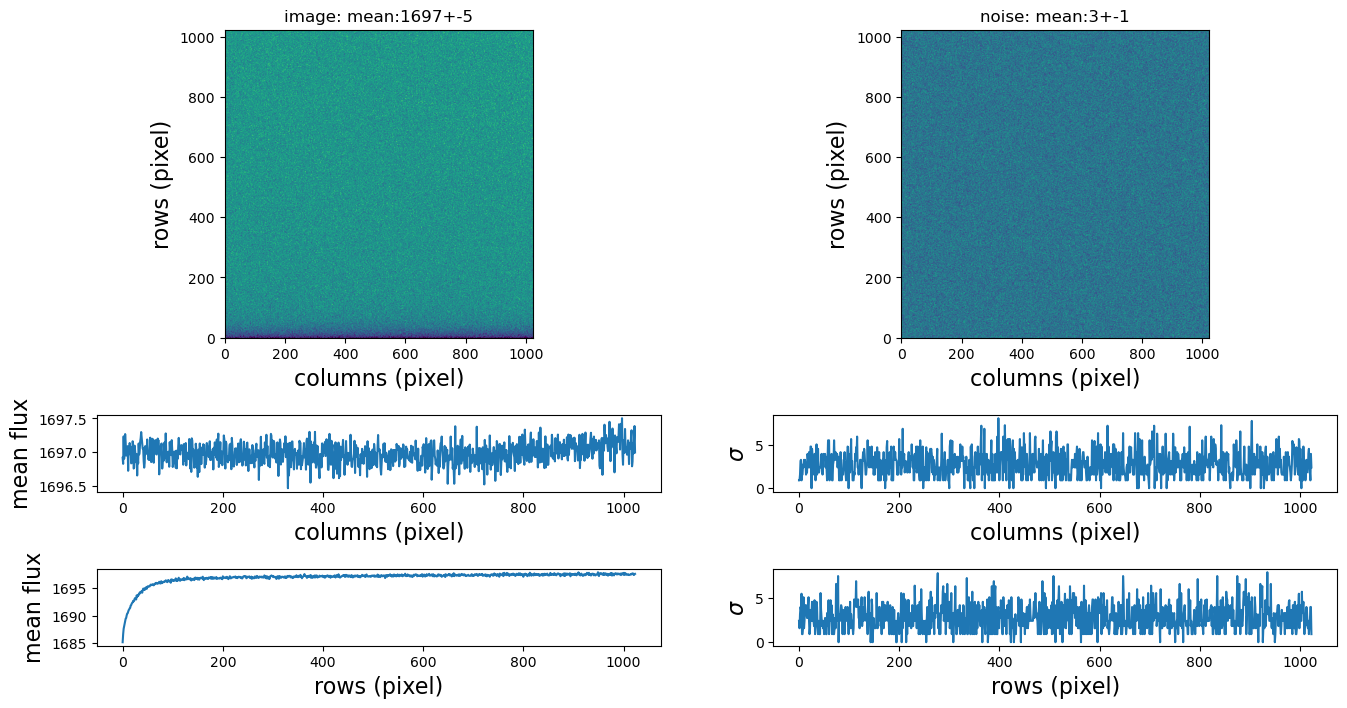

In [8]:
# plot master bias
s4plt.plot_cal_frame(p["master_bias"], 
                     percentile=99.5, 
                     combine_rows=True, 
                     combine_cols=True)

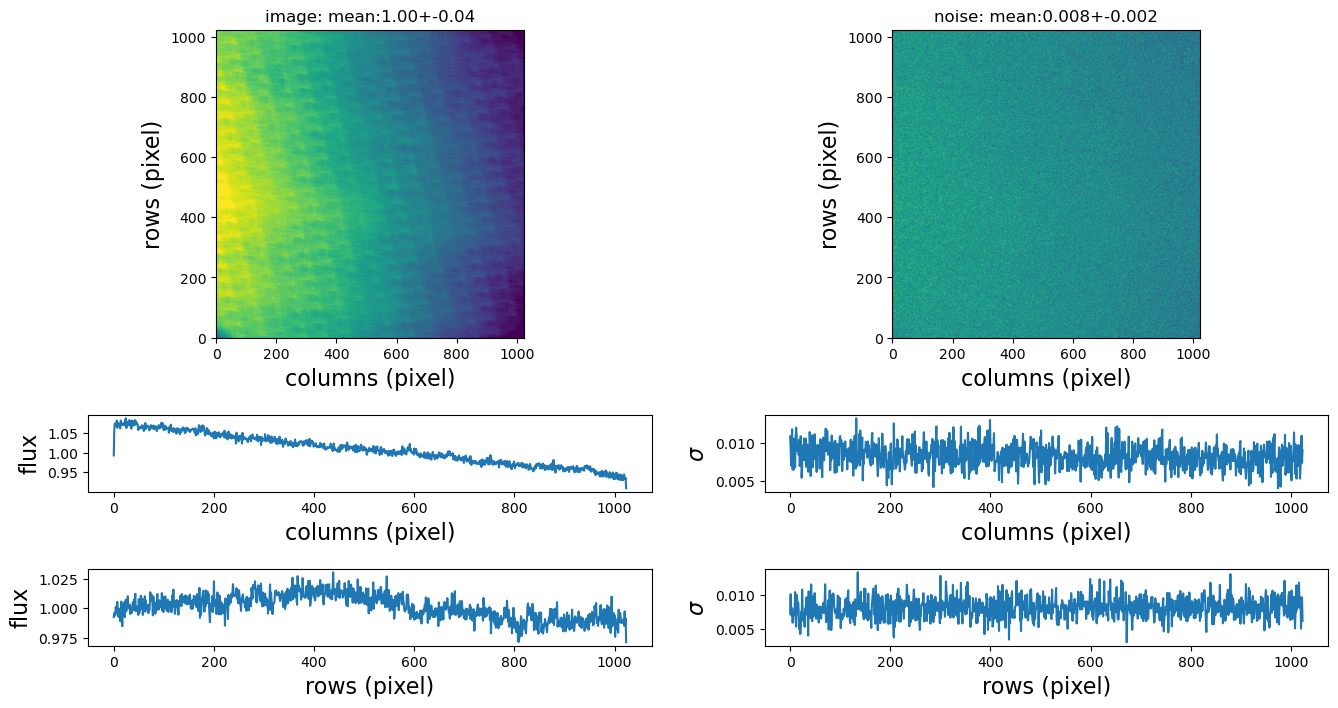

In [9]:
# plot master flat
s4plt.plot_cal_frame(p["master_flat"], 
                     percentile=99.5, 
                     xcut=512, 
                     ycut=512)

***
# <font color='darkblue'>Science image reduction</font> 

***
# <font color='darkblue'>Polarimetry</font> 

In [10]:
# set an object ID matching the ID in the image header keyword 'OBJECT'
OBJECTID = "Hilt 652" # HD111579 is a polarimetric standard

# create a list of science data 
pol_list = glob.glob("{}/{}".format(datadir,"*stdpol.fits"))

# set instrument mode to "POLAR"
inst_mode = p['INSTMODE_POLARIMETRY_KEYVALUE']

FORCE = False

## Reduce scientific exposures in `POLARIMETRY HALF-WAVE` mode

In [11]:
# initial set up
polar_mode = p['POLARIMETRY_L2_KEYVALUE']
polsuffix = "_{}_{}".format(inst_mode,polar_mode)

# set suffix for output stack filename
l2_stack_suffix = "{}_s4c{}_{}{}".format(NIGHTDIR, 
                                        CHANNEL, 
                                        OBJECTID.replace(" ",""), 
                                        polsuffix)

# make a list of half-wave files (L2)
pol_l2_list = s4utils.select_fits_files_with_keyword(pol_list, 'WPSEL', 'L2')

/Users/eder/anaconda3/lib/python3.11/site-packages/astropop/framedata/_compat.py:133: UserWarning: Duplicated key GFOC. First value will be used.
  warnings.warn(f'Duplicated key {k}. First value will be used.')
/Users/eder/anaconda3/lib/python3.11/site-packages/astropop/framedata/_compat.py:133: UserWarning: Duplicated key GFOC. First value will be used.
  warnings.warn(f'Duplicated key {k}. First value will be used.')


0 Reference image: /Users/eder/Data/SPARC4/minidata//sparc4acs1/20230604/20230604_s4c1_000473_stdpol.fits
OBJECT files: 16
Loading science frames to memory ... 
gain: 3.37 electron / adu
Calibrating science frames (CR, gain, bias, flat) ... 
Calibrating science frame 1 of 16 : 20230604_s4c1_000473_stdpol.fits 


/Users/eder/anaconda3/lib/python3.11/site-packages/astropop/_db.py:123: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if k in self.keywords or add_columns:
/Users/eder/anaconda3/lib/python3.11/site-packages/astropop/_db.py:82: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if item not in self.keywords:
/Users/eder/anaconda3/lib/python3.11/site-packages/astropop/_db.py:63: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if name in self.keywords:
/Users/eder/anaconda3/lib/python3.11/site-packages/astropop/_db.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  while col in self.keywords:
/Users/eder/anaconda3/lib/python3.11/site-packages/astropop/framedata/_compat.py:

Calibrating science frame 2 of 16 : 20230604_s4c1_000484_stdpol.fits 


2023-11-24 14:19:41,024 astropy - WARNING - VerifyWarning: Keyword name 'astropop gain_corrected' is greater than 8 characters or contains characters not allowed by the FITS standard; a HIERARCH card will be created.  [logger]
2023-11-24 14:19:41,025 astropy - WARNING - VerifyWarning: Keyword name 'astropop gain_corrected_value' is greater than 8 characters or contains characters not allowed by the FITS standard; a HIERARCH card will be created.  [logger]
2023-11-24 14:19:41,026 astropy - WARNING - VerifyWarning: Keyword name 'astropop gain_corrected_unit' is greater than 8 characters or contains characters not allowed by the FITS standard; a HIERARCH card will be created.  [logger]
2023-11-24 14:19:41,165 astropy - WARNING - VerifyWarning: Keyword name 'astropop gain_corrected' is greater than 8 characters or contains characters not allowed by the FITS standard; a HIERARCH card will be created.  [logger]
2023-11-24 14:19:41,166 astropy - WARNING - VerifyWarning: Keyword name 'astropop

Calibrating science frame 3 of 16 : 20230604_s4c1_000481_stdpol.fits 


2023-11-24 14:19:41,391 astropy - WARNING - VerifyWarning: Keyword name 'astropop gain_corrected' is greater than 8 characters or contains characters not allowed by the FITS standard; a HIERARCH card will be created.  [logger]
2023-11-24 14:19:41,392 astropy - WARNING - VerifyWarning: Keyword name 'astropop gain_corrected_value' is greater than 8 characters or contains characters not allowed by the FITS standard; a HIERARCH card will be created.  [logger]
2023-11-24 14:19:41,393 astropy - WARNING - VerifyWarning: Keyword name 'astropop gain_corrected_unit' is greater than 8 characters or contains characters not allowed by the FITS standard; a HIERARCH card will be created.  [logger]
2023-11-24 14:19:41,536 astropy - WARNING - VerifyWarning: Keyword name 'astropop gain_corrected' is greater than 8 characters or contains characters not allowed by the FITS standard; a HIERARCH card will be created.  [logger]
2023-11-24 14:19:41,537 astropy - WARNING - VerifyWarning: Keyword name 'astropop

Calibrating science frame 4 of 16 : 20230604_s4c1_000485_stdpol.fits 


2023-11-24 14:19:41,774 astropy - WARNING - VerifyWarning: Keyword name 'astropop gain_corrected' is greater than 8 characters or contains characters not allowed by the FITS standard; a HIERARCH card will be created.  [logger]
2023-11-24 14:19:41,775 astropy - WARNING - VerifyWarning: Keyword name 'astropop gain_corrected_value' is greater than 8 characters or contains characters not allowed by the FITS standard; a HIERARCH card will be created.  [logger]
2023-11-24 14:19:41,775 astropy - WARNING - VerifyWarning: Keyword name 'astropop gain_corrected_unit' is greater than 8 characters or contains characters not allowed by the FITS standard; a HIERARCH card will be created.  [logger]
2023-11-24 14:19:41,918 astropy - WARNING - VerifyWarning: Keyword name 'astropop gain_corrected' is greater than 8 characters or contains characters not allowed by the FITS standard; a HIERARCH card will be created.  [logger]
2023-11-24 14:19:41,919 astropy - WARNING - VerifyWarning: Keyword name 'astropop

Calibrating science frame 5 of 16 : 20230604_s4c1_000486_stdpol.fits 


2023-11-24 14:19:42,173 astropy - WARNING - VerifyWarning: Keyword name 'astropop gain_corrected' is greater than 8 characters or contains characters not allowed by the FITS standard; a HIERARCH card will be created.  [logger]
2023-11-24 14:19:42,174 astropy - WARNING - VerifyWarning: Keyword name 'astropop gain_corrected_value' is greater than 8 characters or contains characters not allowed by the FITS standard; a HIERARCH card will be created.  [logger]
2023-11-24 14:19:42,174 astropy - WARNING - VerifyWarning: Keyword name 'astropop gain_corrected_unit' is greater than 8 characters or contains characters not allowed by the FITS standard; a HIERARCH card will be created.  [logger]
2023-11-24 14:19:42,321 astropy - WARNING - VerifyWarning: Keyword name 'astropop gain_corrected' is greater than 8 characters or contains characters not allowed by the FITS standard; a HIERARCH card will be created.  [logger]
2023-11-24 14:19:42,322 astropy - WARNING - VerifyWarning: Keyword name 'astropop

Calibrating science frame 6 of 16 : 20230604_s4c1_000483_stdpol.fits 


2023-11-24 14:19:42,553 astropy - WARNING - VerifyWarning: Keyword name 'astropop gain_corrected' is greater than 8 characters or contains characters not allowed by the FITS standard; a HIERARCH card will be created.  [logger]
2023-11-24 14:19:42,553 astropy - WARNING - VerifyWarning: Keyword name 'astropop gain_corrected_value' is greater than 8 characters or contains characters not allowed by the FITS standard; a HIERARCH card will be created.  [logger]
2023-11-24 14:19:42,554 astropy - WARNING - VerifyWarning: Keyword name 'astropop gain_corrected_unit' is greater than 8 characters or contains characters not allowed by the FITS standard; a HIERARCH card will be created.  [logger]
2023-11-24 14:19:42,695 astropy - WARNING - VerifyWarning: Keyword name 'astropop gain_corrected' is greater than 8 characters or contains characters not allowed by the FITS standard; a HIERARCH card will be created.  [logger]
2023-11-24 14:19:42,696 astropy - WARNING - VerifyWarning: Keyword name 'astropop

Calibrating science frame 7 of 16 : 20230604_s4c1_000477_stdpol.fits 


2023-11-24 14:19:42,925 astropy - WARNING - VerifyWarning: Keyword name 'astropop gain_corrected' is greater than 8 characters or contains characters not allowed by the FITS standard; a HIERARCH card will be created.  [logger]
2023-11-24 14:19:42,926 astropy - WARNING - VerifyWarning: Keyword name 'astropop gain_corrected_value' is greater than 8 characters or contains characters not allowed by the FITS standard; a HIERARCH card will be created.  [logger]
2023-11-24 14:19:42,927 astropy - WARNING - VerifyWarning: Keyword name 'astropop gain_corrected_unit' is greater than 8 characters or contains characters not allowed by the FITS standard; a HIERARCH card will be created.  [logger]
2023-11-24 14:19:43,067 astropy - WARNING - VerifyWarning: Keyword name 'astropop gain_corrected' is greater than 8 characters or contains characters not allowed by the FITS standard; a HIERARCH card will be created.  [logger]
2023-11-24 14:19:43,068 astropy - WARNING - VerifyWarning: Keyword name 'astropop

Calibrating science frame 8 of 16 : 20230604_s4c1_000482_stdpol.fits 


2023-11-24 14:19:43,299 astropy - WARNING - VerifyWarning: Keyword name 'astropop gain_corrected' is greater than 8 characters or contains characters not allowed by the FITS standard; a HIERARCH card will be created.  [logger]
2023-11-24 14:19:43,300 astropy - WARNING - VerifyWarning: Keyword name 'astropop gain_corrected_value' is greater than 8 characters or contains characters not allowed by the FITS standard; a HIERARCH card will be created.  [logger]
2023-11-24 14:19:43,301 astropy - WARNING - VerifyWarning: Keyword name 'astropop gain_corrected_unit' is greater than 8 characters or contains characters not allowed by the FITS standard; a HIERARCH card will be created.  [logger]
2023-11-24 14:19:43,440 astropy - WARNING - VerifyWarning: Keyword name 'astropop gain_corrected' is greater than 8 characters or contains characters not allowed by the FITS standard; a HIERARCH card will be created.  [logger]
2023-11-24 14:19:43,441 astropy - WARNING - VerifyWarning: Keyword name 'astropop

Calibrating science frame 9 of 16 : 20230604_s4c1_000474_stdpol.fits 


2023-11-24 14:19:43,667 astropy - WARNING - VerifyWarning: Keyword name 'astropop gain_corrected' is greater than 8 characters or contains characters not allowed by the FITS standard; a HIERARCH card will be created.  [logger]
2023-11-24 14:19:43,668 astropy - WARNING - VerifyWarning: Keyword name 'astropop gain_corrected_value' is greater than 8 characters or contains characters not allowed by the FITS standard; a HIERARCH card will be created.  [logger]
2023-11-24 14:19:43,669 astropy - WARNING - VerifyWarning: Keyword name 'astropop gain_corrected_unit' is greater than 8 characters or contains characters not allowed by the FITS standard; a HIERARCH card will be created.  [logger]
2023-11-24 14:19:43,803 astropy - WARNING - VerifyWarning: Keyword name 'astropop gain_corrected' is greater than 8 characters or contains characters not allowed by the FITS standard; a HIERARCH card will be created.  [logger]
2023-11-24 14:19:43,804 astropy - WARNING - VerifyWarning: Keyword name 'astropop

Calibrating science frame 10 of 16 : 20230604_s4c1_000471_stdpol.fits 


2023-11-24 14:19:44,030 astropy - WARNING - VerifyWarning: Keyword name 'astropop gain_corrected' is greater than 8 characters or contains characters not allowed by the FITS standard; a HIERARCH card will be created.  [logger]
2023-11-24 14:19:44,031 astropy - WARNING - VerifyWarning: Keyword name 'astropop gain_corrected_value' is greater than 8 characters or contains characters not allowed by the FITS standard; a HIERARCH card will be created.  [logger]
2023-11-24 14:19:44,032 astropy - WARNING - VerifyWarning: Keyword name 'astropop gain_corrected_unit' is greater than 8 characters or contains characters not allowed by the FITS standard; a HIERARCH card will be created.  [logger]
2023-11-24 14:19:44,172 astropy - WARNING - VerifyWarning: Keyword name 'astropop gain_corrected' is greater than 8 characters or contains characters not allowed by the FITS standard; a HIERARCH card will be created.  [logger]
2023-11-24 14:19:44,173 astropy - WARNING - VerifyWarning: Keyword name 'astropop

Calibrating science frame 11 of 16 : 20230604_s4c1_000478_stdpol.fits 


2023-11-24 14:19:44,400 astropy - WARNING - VerifyWarning: Keyword name 'astropop gain_corrected' is greater than 8 characters or contains characters not allowed by the FITS standard; a HIERARCH card will be created.  [logger]
2023-11-24 14:19:44,401 astropy - WARNING - VerifyWarning: Keyword name 'astropop gain_corrected_value' is greater than 8 characters or contains characters not allowed by the FITS standard; a HIERARCH card will be created.  [logger]
2023-11-24 14:19:44,402 astropy - WARNING - VerifyWarning: Keyword name 'astropop gain_corrected_unit' is greater than 8 characters or contains characters not allowed by the FITS standard; a HIERARCH card will be created.  [logger]
2023-11-24 14:19:44,537 astropy - WARNING - VerifyWarning: Keyword name 'astropop gain_corrected' is greater than 8 characters or contains characters not allowed by the FITS standard; a HIERARCH card will be created.  [logger]
2023-11-24 14:19:44,538 astropy - WARNING - VerifyWarning: Keyword name 'astropop

Calibrating science frame 12 of 16 : 20230604_s4c1_000480_stdpol.fits 


2023-11-24 14:19:44,814 astropy - WARNING - VerifyWarning: Keyword name 'astropop gain_corrected' is greater than 8 characters or contains characters not allowed by the FITS standard; a HIERARCH card will be created.  [logger]
2023-11-24 14:19:44,815 astropy - WARNING - VerifyWarning: Keyword name 'astropop gain_corrected_value' is greater than 8 characters or contains characters not allowed by the FITS standard; a HIERARCH card will be created.  [logger]
2023-11-24 14:19:44,815 astropy - WARNING - VerifyWarning: Keyword name 'astropop gain_corrected_unit' is greater than 8 characters or contains characters not allowed by the FITS standard; a HIERARCH card will be created.  [logger]
2023-11-24 14:19:44,954 astropy - WARNING - VerifyWarning: Keyword name 'astropop gain_corrected' is greater than 8 characters or contains characters not allowed by the FITS standard; a HIERARCH card will be created.  [logger]
2023-11-24 14:19:44,956 astropy - WARNING - VerifyWarning: Keyword name 'astropop

Calibrating science frame 13 of 16 : 20230604_s4c1_000476_stdpol.fits 


2023-11-24 14:19:45,183 astropy - WARNING - VerifyWarning: Keyword name 'astropop gain_corrected' is greater than 8 characters or contains characters not allowed by the FITS standard; a HIERARCH card will be created.  [logger]
2023-11-24 14:19:45,184 astropy - WARNING - VerifyWarning: Keyword name 'astropop gain_corrected_value' is greater than 8 characters or contains characters not allowed by the FITS standard; a HIERARCH card will be created.  [logger]
2023-11-24 14:19:45,185 astropy - WARNING - VerifyWarning: Keyword name 'astropop gain_corrected_unit' is greater than 8 characters or contains characters not allowed by the FITS standard; a HIERARCH card will be created.  [logger]
2023-11-24 14:19:45,325 astropy - WARNING - VerifyWarning: Keyword name 'astropop gain_corrected' is greater than 8 characters or contains characters not allowed by the FITS standard; a HIERARCH card will be created.  [logger]
2023-11-24 14:19:45,326 astropy - WARNING - VerifyWarning: Keyword name 'astropop

Calibrating science frame 14 of 16 : 20230604_s4c1_000479_stdpol.fits 


2023-11-24 14:19:45,547 astropy - WARNING - VerifyWarning: Keyword name 'astropop gain_corrected' is greater than 8 characters or contains characters not allowed by the FITS standard; a HIERARCH card will be created.  [logger]
2023-11-24 14:19:45,548 astropy - WARNING - VerifyWarning: Keyword name 'astropop gain_corrected_value' is greater than 8 characters or contains characters not allowed by the FITS standard; a HIERARCH card will be created.  [logger]
2023-11-24 14:19:45,549 astropy - WARNING - VerifyWarning: Keyword name 'astropop gain_corrected_unit' is greater than 8 characters or contains characters not allowed by the FITS standard; a HIERARCH card will be created.  [logger]
2023-11-24 14:19:45,692 astropy - WARNING - VerifyWarning: Keyword name 'astropop gain_corrected' is greater than 8 characters or contains characters not allowed by the FITS standard; a HIERARCH card will be created.  [logger]
2023-11-24 14:19:45,693 astropy - WARNING - VerifyWarning: Keyword name 'astropop

Calibrating science frame 15 of 16 : 20230604_s4c1_000472_stdpol.fits 


2023-11-24 14:19:45,910 astropy - WARNING - VerifyWarning: Keyword name 'astropop gain_corrected' is greater than 8 characters or contains characters not allowed by the FITS standard; a HIERARCH card will be created.  [logger]
2023-11-24 14:19:45,911 astropy - WARNING - VerifyWarning: Keyword name 'astropop gain_corrected_value' is greater than 8 characters or contains characters not allowed by the FITS standard; a HIERARCH card will be created.  [logger]
2023-11-24 14:19:45,911 astropy - WARNING - VerifyWarning: Keyword name 'astropop gain_corrected_unit' is greater than 8 characters or contains characters not allowed by the FITS standard; a HIERARCH card will be created.  [logger]
2023-11-24 14:19:46,055 astropy - WARNING - VerifyWarning: Keyword name 'astropop gain_corrected' is greater than 8 characters or contains characters not allowed by the FITS standard; a HIERARCH card will be created.  [logger]
2023-11-24 14:19:46,056 astropy - WARNING - VerifyWarning: Keyword name 'astropop

Calibrating science frame 16 of 16 : 20230604_s4c1_000475_stdpol.fits 


2023-11-24 14:19:46,294 astropy - WARNING - VerifyWarning: Keyword name 'astropop gain_corrected' is greater than 8 characters or contains characters not allowed by the FITS standard; a HIERARCH card will be created.  [logger]
2023-11-24 14:19:46,295 astropy - WARNING - VerifyWarning: Keyword name 'astropop gain_corrected_value' is greater than 8 characters or contains characters not allowed by the FITS standard; a HIERARCH card will be created.  [logger]
2023-11-24 14:19:46,296 astropy - WARNING - VerifyWarning: Keyword name 'astropop gain_corrected_unit' is greater than 8 characters or contains characters not allowed by the FITS standard; a HIERARCH card will be created.  [logger]
2023-11-24 14:19:46,444 astropy - WARNING - VerifyWarning: Keyword name 'astropop gain_corrected' is greater than 8 characters or contains characters not allowed by the FITS standard; a HIERARCH card will be created.  [logger]
2023-11-24 14:19:46,446 astropy - WARNING - VerifyWarning: Keyword name 'astropop

Registering science frames and stacking them ... 
0 /Users/eder/Data/SPARC4/minidata//sparc4acs1/20230604/20230604_s4c1_000473_stdpol.fits
1 /Users/eder/Data/SPARC4/minidata//sparc4acs1/20230604/20230604_s4c1_000484_stdpol.fits
2 /Users/eder/Data/SPARC4/minidata//sparc4acs1/20230604/20230604_s4c1_000481_stdpol.fits
3 /Users/eder/Data/SPARC4/minidata//sparc4acs1/20230604/20230604_s4c1_000485_stdpol.fits
4 /Users/eder/Data/SPARC4/minidata//sparc4acs1/20230604/20230604_s4c1_000486_stdpol.fits
5 /Users/eder/Data/SPARC4/minidata//sparc4acs1/20230604/20230604_s4c1_000483_stdpol.fits
6 /Users/eder/Data/SPARC4/minidata//sparc4acs1/20230604/20230604_s4c1_000477_stdpol.fits
7 /Users/eder/Data/SPARC4/minidata//sparc4acs1/20230604/20230604_s4c1_000482_stdpol.fits
8 /Users/eder/Data/SPARC4/minidata//sparc4acs1/20230604/20230604_s4c1_000474_stdpol.fits
9 /Users/eder/Data/SPARC4/minidata//sparc4acs1/20230604/20230604_s4c1_000471_stdpol.fits
10 /Users/eder/Data/SPARC4/minidata//sparc4acs1/20230604/202

2023-11-24 14:19:46,672 astropop - INFO - Filling registered image with cval=666.24  [register]
2023-11-24 14:19:46,679 astropop - INFO - Registering image with: translation=[ 0.5  -0.75], rotation=0.00°  [register]
2023-11-24 14:19:46,854 astropop - INFO - Registering image 3 from 16  [register]
2023-11-24 14:19:46,965 astropop - INFO - Filling registered image with cval=670.35  [register]
2023-11-24 14:19:46,969 astropop - INFO - Registering image with: translation=[-1.  -0.5], rotation=0.00°  [register]
2023-11-24 14:19:47,103 astropop - INFO - Registering image 4 from 16  [register]
2023-11-24 14:19:47,214 astropop - INFO - Filling registered image with cval=663.40  [register]
2023-11-24 14:19:47,220 astropop - INFO - Registering image with: translation=[-0.25 -0.5 ], rotation=0.00°  [register]
2023-11-24 14:19:47,353 astropop - INFO - Registering image 5 from 16  [register]
2023-11-24 14:19:47,459 astropop - INFO - Filling registered image with cval=668.21  [register]
2023-11-24 1

Creating new catalog of detected sources:
Running photometry for multiple apertures:
Aperture radius of 5 pixels: 1 of 16 :
Aperture radius of 6 pixels: 2 of 16 :
Aperture radius of 7 pixels: 3 of 16 :
Aperture radius of 8 pixels: 4 of 16 :
Aperture radius of 9 pixels: 5 of 16 :
Aperture radius of 10 pixels: 6 of 16 :
Aperture radius of 11 pixels: 7 of 16 :
Aperture radius of 12 pixels: 8 of 16 :
Aperture radius of 13 pixels: 9 of 16 :
Aperture radius of 14 pixels: 10 of 16 :
Aperture radius of 15 pixels: 11 of 16 :
Aperture radius of 16 pixels: 12 of 16 :
Aperture radius of 17 pixels: 13 of 16 :
Aperture radius of 18 pixels: 14 of 16 :
Aperture radius of 19 pixels: 15 of 16 :
Aperture radius of 20 pixels: 16 of 16 :


2023-11-24 14:19:53,416 astropy - WARNING - TimeDeltaMissingUnitWarning: Numerical value without unit or explicit format passed to TimeDelta, assuming days  [logger]


The 16 images will be reduced in 1 loops of 100 images each time
Running loop 0 of 1 -> images in loop: 0 to 16 ... 
OBJECT files: 16
Creating output list of processed science frames ... 
1 of 16 is reduced? True -> /Users/eder/Data/SPARC4/minidata/reduced//sparc4acs1/20230604/20230604_s4c1_000473_stdpol_proc.fits
2 of 16 is reduced? True -> /Users/eder/Data/SPARC4/minidata/reduced//sparc4acs1/20230604/20230604_s4c1_000476_stdpol_proc.fits
3 of 16 is reduced? True -> /Users/eder/Data/SPARC4/minidata/reduced//sparc4acs1/20230604/20230604_s4c1_000482_stdpol_proc.fits
4 of 16 is reduced? True -> /Users/eder/Data/SPARC4/minidata/reduced//sparc4acs1/20230604/20230604_s4c1_000481_stdpol_proc.fits
5 of 16 is reduced? True -> /Users/eder/Data/SPARC4/minidata/reduced//sparc4acs1/20230604/20230604_s4c1_000475_stdpol_proc.fits
6 of 16 is reduced? True -> /Users/eder/Data/SPARC4/minidata/reduced//sparc4acs1/20230604/20230604_s4c1_000479_stdpol_proc.fits
7 of 16 is reduced? True -> /Users/eder/Data

/Users/eder/anaconda3/lib/python3.11/site-packages/astropop/framedata/_compat.py:133: UserWarning: Duplicated key GFOC. First value will be used.
  warnings.warn(f'Duplicated key {k}. First value will be used.')
/Users/eder/anaconda3/lib/python3.11/site-packages/astropop/framedata/_compat.py:133: UserWarning: Duplicated key GFOC. First value will be used.
  warnings.warn(f'Duplicated key {k}. First value will be used.')
/Users/eder/anaconda3/lib/python3.11/site-packages/astropop/_db.py:123: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if k in self.keywords or add_columns:
/Users/eder/anaconda3/lib/python3.11/site-packages/astropop/_db.py:82: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if item not in self.keywords:
/Users/eder/anaconda3/lib/python3.11/site-packages/astropop/_db.py:63: FutureWarning: elementwise comparison 

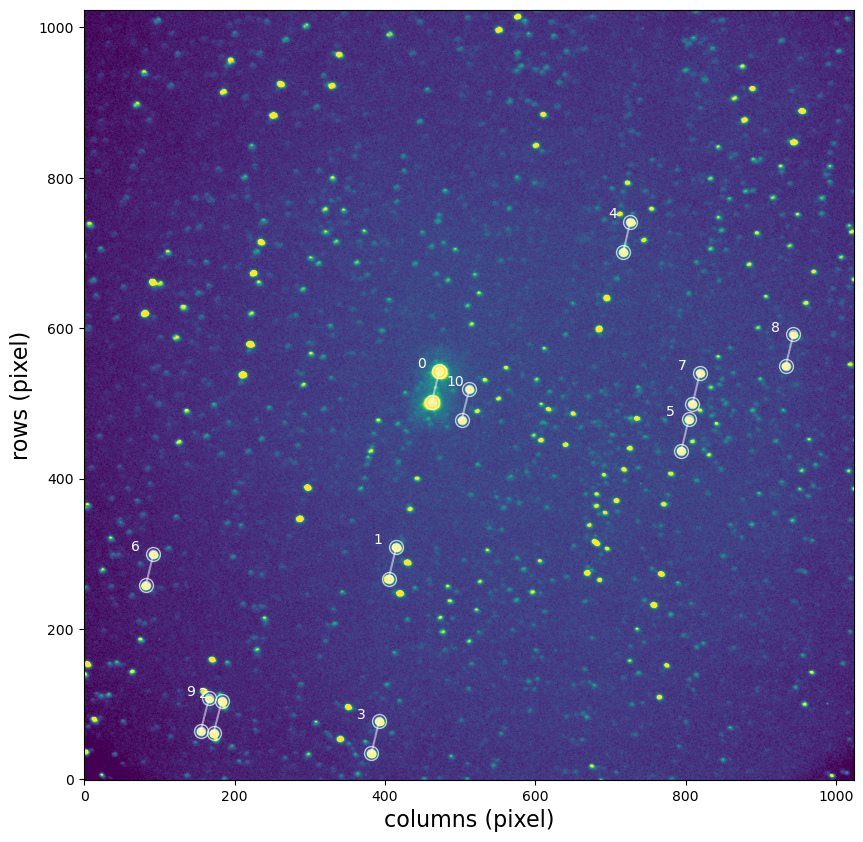

In [12]:
# run stack and reduce individual science images (produce *_proc.fits)
p = s4pipelib.stack_and_reduce_sci_images(p,
                                          pol_l2_list,
                                          reducedir,
                                          stack_suffix=l2_stack_suffix,
                                          force=FORCE,
                                          match_frames=True,
                                          polarimetry=True,                                              
                                          verbose=True,
                                          plot=True) 

## Calculate `HALF-WAVE` POLARIMETRY

In [13]:
# input reduced files list
red_pol_l2_list = ["{}/{}".format(reducedir, os.path.basename(f).replace(".fits","_proc.fits")) for f in pol_l2_list]
    
# group input list into polarimetric sequences
pol_sequences = s4utils.select_polar_sequences(red_pol_l2_list, 
                                               sortlist=True, 
                                               npos_in_seq=16, 
                                               rolling_seq=False, 
                                               verbose=True)

Sequence 1 of 1 : 16 files for 16 waveplate positions


There is already a polarimetry product : /Users/eder/Data/SPARC4/minidata/reduced//sparc4acs1/20230604/20230604_s4c1_000471_stdpol_l2_polar.fits
Source index: i=0 
Source RA=280.21344797959534 Dec=-6.779402186409276 mag=-18.4098+-0.0002
Best aperture radius: 12.0 pixels
Polarization in Q: 0.0388+-0.0002
Polarization in U: -0.0189+-0.0002
Polarization in V: nan+-nan
Total linear polarization p: 0.0432+-0.0002
Angle of polarization theta: 167.0+-0.1
Free constant k: 1+-nan
Zero of polarization: 0.0+-0.0
RMS of zi residuals: 0.00031
Reduced chi-square (n=8.0, DOF=6.0): 0.30


/Users/eder/anaconda3/lib/python3.11/site-packages/astropop/math/physical.py:99: RuntimeWarning: invalid value encountered in cast
  return -np.int_(np.floor(np.log10(np.abs(std)))) + sig - 1
/Users/eder/anaconda3/lib/python3.11/site-packages/astropop/math/physical.py:99: RuntimeWarning: divide by zero encountered in log10
  return -np.int_(np.floor(np.log10(np.abs(std)))) + sig - 1
/Users/eder/anaconda3/lib/python3.11/site-packages/astropop/math/physical.py:99: RuntimeWarning: overflow encountered in scalar negative
  return -np.int_(np.floor(np.log10(np.abs(std)))) + sig - 1
<__array_function__ internals>:200: RuntimeWarning: invalid value encountered in cast


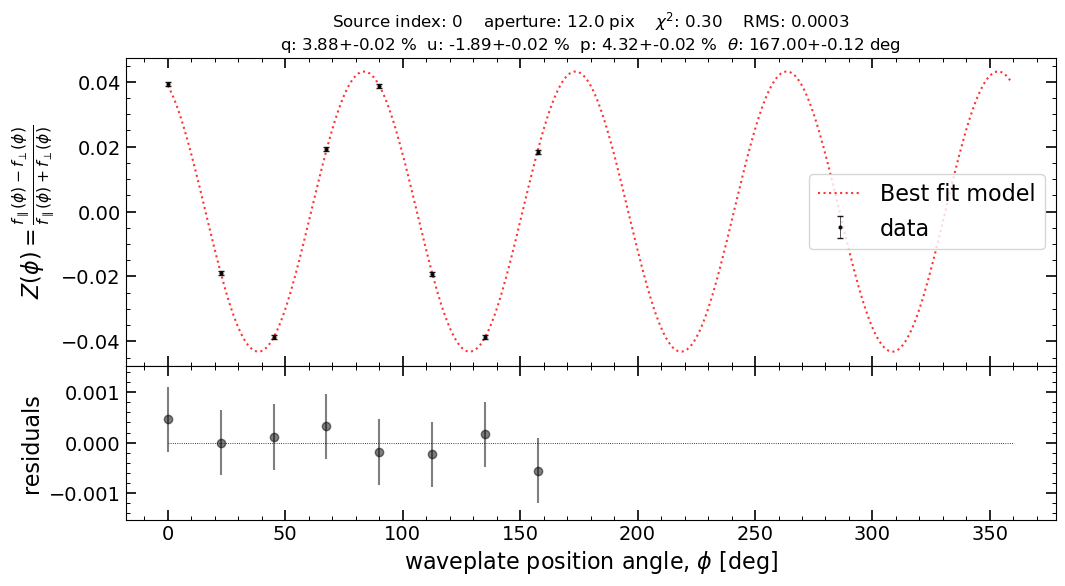

In [14]:
l2_polar_products = []

for i in range(len(pol_sequences)) :    
        
    if len(pol_sequences[i]) == 0 :
        continue
            
    polarproduct = s4pipelib.compute_polarimetry(pol_sequences[i], 
                                                 wppos_key = 'WPPOS',
                                                 wave_plate = 'halfwave',
                                                 base_aperture = p['APERTURE_RADIUS_FOR_PHOTOMETRY_IN_POLAR'],
                                                 compute_k = True,
                                                 fit_zero = False,
                                                 force = FORCE,
                                                 zero = 0)

    pol_results = s4pipelib.get_polarimetry_results(polarproduct,
                                                    source_index=0,
                                                    min_aperture=4,
                                                    max_aperture=25,
                                                    plot=True,
                                                    verbose=True)
    
    l2_polar_products.append(polarproduct)

## Time series of `HALF-WAVE` polarimetry data

In [15]:
# set suffix for output time series filename
ts_suffix = "{}_s4c{}_{}{}".format(NIGHTDIR,
                                   CHANNEL,
                                   OBJECTID.replace(" ",""), 
                                   polsuffix)    

PolarTimeSeriesProduct = s4pipelib.polar_time_series(l2_polar_products,
                                                     reduce_dir=reducedir,
                                                     ts_suffix=ts_suffix,
                                                     aperture_radius=p['APERTURE_RADIUS_FOR_PHOTOMETRY_IN_POLAR'],
                                                     min_aperture=p['MIN_APERTURE_FOR_POLARIMETRY'],
                                                     max_aperture=p['MAX_APERTURE_FOR_POLARIMETRY'],
                                                     force=FORCE)

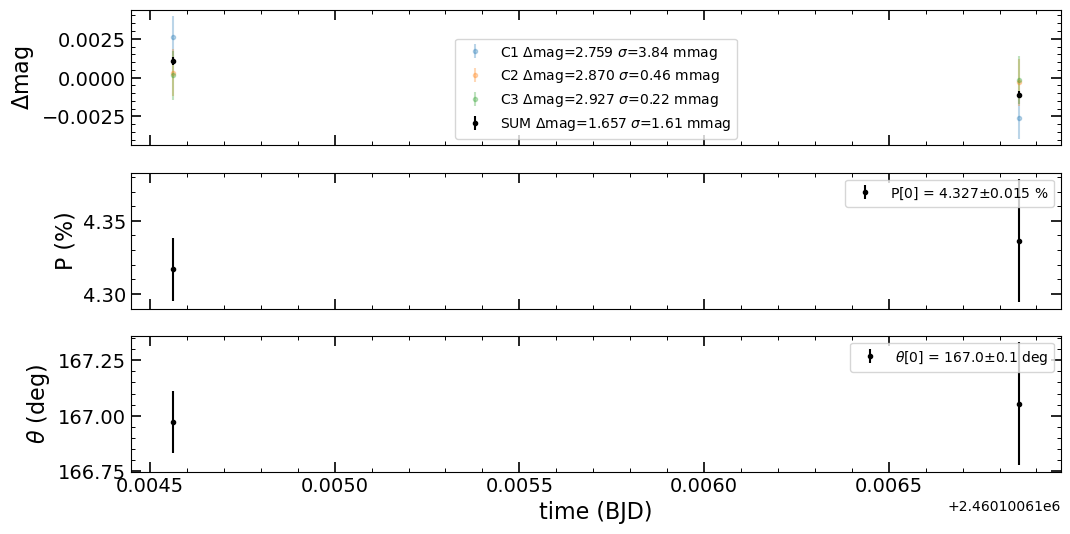

In [16]:
s4plt.plot_polar_time_series(PolarTimeSeriesProduct, 
                             target=0, 
                             comps=[1,2,3], 
                             plot_total_polarization=True, 
                             plot_polarization_angle=True)

## Reduce scientific exposures in `POLARIMETRY QUARTER-WAVE` mode

In [17]:
# initial set up
polar_mode = p['POLARIMETRY_L4_KEYVALUE']
polsuffix = "_{}_{}".format(inst_mode,polar_mode)

# set suffix for output stack filename
l4_stack_suffix = "{}_s4c{}_{}{}".format(NIGHTDIR, 
                                        CHANNEL, 
                                        OBJECTID.replace(" ",""), 
                                        polsuffix)

# make a list of quarter-wave files (L4)
pol_l4_list = s4utils.select_fits_files_with_keyword(pol_list, 'WPSEL', 'L4')

/Users/eder/anaconda3/lib/python3.11/site-packages/astropop/framedata/_compat.py:133: UserWarning: Duplicated key GFOC. First value will be used.
  warnings.warn(f'Duplicated key {k}. First value will be used.')
/Users/eder/anaconda3/lib/python3.11/site-packages/astropop/framedata/_compat.py:133: UserWarning: Duplicated key GFOC. First value will be used.
  warnings.warn(f'Duplicated key {k}. First value will be used.')


12 Reference image: /Users/eder/Data/SPARC4/minidata//sparc4acs1/20230604/20230604_s4c1_000499_stdpol.fits
OBJECT files: 16
Loading science frames to memory ... 


/Users/eder/anaconda3/lib/python3.11/site-packages/astropop/_db.py:123: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if k in self.keywords or add_columns:
/Users/eder/anaconda3/lib/python3.11/site-packages/astropop/_db.py:82: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if item not in self.keywords:
/Users/eder/anaconda3/lib/python3.11/site-packages/astropop/_db.py:63: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if name in self.keywords:
/Users/eder/anaconda3/lib/python3.11/site-packages/astropop/_db.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  while col in self.keywords:
/Users/eder/anaconda3/lib/python3.11/site-packages/astropop/framedata/_compat.py:

gain: 3.37 electron / adu
Calibrating science frames (CR, gain, bias, flat) ... 
Calibrating science frame 1 of 16 : 20230604_s4c1_000499_stdpol.fits 


2023-11-24 14:20:19,130 astropy - WARNING - VerifyWarning: Keyword name 'astropop gain_corrected' is greater than 8 characters or contains characters not allowed by the FITS standard; a HIERARCH card will be created.  [logger]
2023-11-24 14:20:19,131 astropy - WARNING - VerifyWarning: Keyword name 'astropop gain_corrected_value' is greater than 8 characters or contains characters not allowed by the FITS standard; a HIERARCH card will be created.  [logger]
2023-11-24 14:20:19,132 astropy - WARNING - VerifyWarning: Keyword name 'astropop gain_corrected_unit' is greater than 8 characters or contains characters not allowed by the FITS standard; a HIERARCH card will be created.  [logger]
2023-11-24 14:20:19,279 astropy - WARNING - VerifyWarning: Keyword name 'astropop gain_corrected' is greater than 8 characters or contains characters not allowed by the FITS standard; a HIERARCH card will be created.  [logger]
2023-11-24 14:20:19,281 astropy - WARNING - VerifyWarning: Keyword name 'astropop

Calibrating science frame 2 of 16 : 20230604_s4c1_000500_stdpol.fits 


2023-11-24 14:20:19,521 astropy - WARNING - VerifyWarning: Keyword name 'astropop gain_corrected' is greater than 8 characters or contains characters not allowed by the FITS standard; a HIERARCH card will be created.  [logger]
2023-11-24 14:20:19,522 astropy - WARNING - VerifyWarning: Keyword name 'astropop gain_corrected_value' is greater than 8 characters or contains characters not allowed by the FITS standard; a HIERARCH card will be created.  [logger]
2023-11-24 14:20:19,523 astropy - WARNING - VerifyWarning: Keyword name 'astropop gain_corrected_unit' is greater than 8 characters or contains characters not allowed by the FITS standard; a HIERARCH card will be created.  [logger]
2023-11-24 14:20:19,664 astropy - WARNING - VerifyWarning: Keyword name 'astropop gain_corrected' is greater than 8 characters or contains characters not allowed by the FITS standard; a HIERARCH card will be created.  [logger]
2023-11-24 14:20:19,666 astropy - WARNING - VerifyWarning: Keyword name 'astropop

Calibrating science frame 3 of 16 : 20230604_s4c1_000488_stdpol.fits 


2023-11-24 14:20:19,900 astropy - WARNING - VerifyWarning: Keyword name 'astropop gain_corrected' is greater than 8 characters or contains characters not allowed by the FITS standard; a HIERARCH card will be created.  [logger]
2023-11-24 14:20:19,901 astropy - WARNING - VerifyWarning: Keyword name 'astropop gain_corrected_value' is greater than 8 characters or contains characters not allowed by the FITS standard; a HIERARCH card will be created.  [logger]
2023-11-24 14:20:19,902 astropy - WARNING - VerifyWarning: Keyword name 'astropop gain_corrected_unit' is greater than 8 characters or contains characters not allowed by the FITS standard; a HIERARCH card will be created.  [logger]
2023-11-24 14:20:20,040 astropy - WARNING - VerifyWarning: Keyword name 'astropop gain_corrected' is greater than 8 characters or contains characters not allowed by the FITS standard; a HIERARCH card will be created.  [logger]
2023-11-24 14:20:20,041 astropy - WARNING - VerifyWarning: Keyword name 'astropop

Calibrating science frame 4 of 16 : 20230604_s4c1_000497_stdpol.fits 


2023-11-24 14:20:20,277 astropy - WARNING - VerifyWarning: Keyword name 'astropop gain_corrected' is greater than 8 characters or contains characters not allowed by the FITS standard; a HIERARCH card will be created.  [logger]
2023-11-24 14:20:20,278 astropy - WARNING - VerifyWarning: Keyword name 'astropop gain_corrected_value' is greater than 8 characters or contains characters not allowed by the FITS standard; a HIERARCH card will be created.  [logger]
2023-11-24 14:20:20,279 astropy - WARNING - VerifyWarning: Keyword name 'astropop gain_corrected_unit' is greater than 8 characters or contains characters not allowed by the FITS standard; a HIERARCH card will be created.  [logger]
2023-11-24 14:20:20,415 astropy - WARNING - VerifyWarning: Keyword name 'astropop gain_corrected' is greater than 8 characters or contains characters not allowed by the FITS standard; a HIERARCH card will be created.  [logger]
2023-11-24 14:20:20,416 astropy - WARNING - VerifyWarning: Keyword name 'astropop

Calibrating science frame 5 of 16 : 20230604_s4c1_000489_stdpol.fits 


2023-11-24 14:20:20,654 astropy - WARNING - VerifyWarning: Keyword name 'astropop gain_corrected' is greater than 8 characters or contains characters not allowed by the FITS standard; a HIERARCH card will be created.  [logger]
2023-11-24 14:20:20,655 astropy - WARNING - VerifyWarning: Keyword name 'astropop gain_corrected_value' is greater than 8 characters or contains characters not allowed by the FITS standard; a HIERARCH card will be created.  [logger]
2023-11-24 14:20:20,656 astropy - WARNING - VerifyWarning: Keyword name 'astropop gain_corrected_unit' is greater than 8 characters or contains characters not allowed by the FITS standard; a HIERARCH card will be created.  [logger]
2023-11-24 14:20:20,796 astropy - WARNING - VerifyWarning: Keyword name 'astropop gain_corrected' is greater than 8 characters or contains characters not allowed by the FITS standard; a HIERARCH card will be created.  [logger]
2023-11-24 14:20:20,798 astropy - WARNING - VerifyWarning: Keyword name 'astropop

Calibrating science frame 6 of 16 : 20230604_s4c1_000498_stdpol.fits 


2023-11-24 14:20:21,031 astropy - WARNING - VerifyWarning: Keyword name 'astropop gain_corrected' is greater than 8 characters or contains characters not allowed by the FITS standard; a HIERARCH card will be created.  [logger]
2023-11-24 14:20:21,032 astropy - WARNING - VerifyWarning: Keyword name 'astropop gain_corrected_value' is greater than 8 characters or contains characters not allowed by the FITS standard; a HIERARCH card will be created.  [logger]
2023-11-24 14:20:21,033 astropy - WARNING - VerifyWarning: Keyword name 'astropop gain_corrected_unit' is greater than 8 characters or contains characters not allowed by the FITS standard; a HIERARCH card will be created.  [logger]
2023-11-24 14:20:21,169 astropy - WARNING - VerifyWarning: Keyword name 'astropop gain_corrected' is greater than 8 characters or contains characters not allowed by the FITS standard; a HIERARCH card will be created.  [logger]
2023-11-24 14:20:21,170 astropy - WARNING - VerifyWarning: Keyword name 'astropop

Calibrating science frame 7 of 16 : 20230604_s4c1_000501_stdpol.fits 


2023-11-24 14:20:21,405 astropy - WARNING - VerifyWarning: Keyword name 'astropop gain_corrected' is greater than 8 characters or contains characters not allowed by the FITS standard; a HIERARCH card will be created.  [logger]
2023-11-24 14:20:21,406 astropy - WARNING - VerifyWarning: Keyword name 'astropop gain_corrected_value' is greater than 8 characters or contains characters not allowed by the FITS standard; a HIERARCH card will be created.  [logger]
2023-11-24 14:20:21,407 astropy - WARNING - VerifyWarning: Keyword name 'astropop gain_corrected_unit' is greater than 8 characters or contains characters not allowed by the FITS standard; a HIERARCH card will be created.  [logger]
2023-11-24 14:20:21,549 astropy - WARNING - VerifyWarning: Keyword name 'astropop gain_corrected' is greater than 8 characters or contains characters not allowed by the FITS standard; a HIERARCH card will be created.  [logger]
2023-11-24 14:20:21,550 astropy - WARNING - VerifyWarning: Keyword name 'astropop

Calibrating science frame 8 of 16 : 20230604_s4c1_000487_stdpol.fits 


2023-11-24 14:20:21,791 astropy - WARNING - VerifyWarning: Keyword name 'astropop gain_corrected' is greater than 8 characters or contains characters not allowed by the FITS standard; a HIERARCH card will be created.  [logger]
2023-11-24 14:20:21,792 astropy - WARNING - VerifyWarning: Keyword name 'astropop gain_corrected_value' is greater than 8 characters or contains characters not allowed by the FITS standard; a HIERARCH card will be created.  [logger]
2023-11-24 14:20:21,793 astropy - WARNING - VerifyWarning: Keyword name 'astropop gain_corrected_unit' is greater than 8 characters or contains characters not allowed by the FITS standard; a HIERARCH card will be created.  [logger]
2023-11-24 14:20:21,926 astropy - WARNING - VerifyWarning: Keyword name 'astropop gain_corrected' is greater than 8 characters or contains characters not allowed by the FITS standard; a HIERARCH card will be created.  [logger]
2023-11-24 14:20:21,927 astropy - WARNING - VerifyWarning: Keyword name 'astropop

Calibrating science frame 9 of 16 : 20230604_s4c1_000502_stdpol.fits 


2023-11-24 14:20:22,160 astropy - WARNING - VerifyWarning: Keyword name 'astropop gain_corrected' is greater than 8 characters or contains characters not allowed by the FITS standard; a HIERARCH card will be created.  [logger]
2023-11-24 14:20:22,161 astropy - WARNING - VerifyWarning: Keyword name 'astropop gain_corrected_value' is greater than 8 characters or contains characters not allowed by the FITS standard; a HIERARCH card will be created.  [logger]
2023-11-24 14:20:22,162 astropy - WARNING - VerifyWarning: Keyword name 'astropop gain_corrected_unit' is greater than 8 characters or contains characters not allowed by the FITS standard; a HIERARCH card will be created.  [logger]
2023-11-24 14:20:22,306 astropy - WARNING - VerifyWarning: Keyword name 'astropop gain_corrected' is greater than 8 characters or contains characters not allowed by the FITS standard; a HIERARCH card will be created.  [logger]
2023-11-24 14:20:22,307 astropy - WARNING - VerifyWarning: Keyword name 'astropop

Calibrating science frame 10 of 16 : 20230604_s4c1_000491_stdpol.fits 


2023-11-24 14:20:22,540 astropy - WARNING - VerifyWarning: Keyword name 'astropop gain_corrected' is greater than 8 characters or contains characters not allowed by the FITS standard; a HIERARCH card will be created.  [logger]
2023-11-24 14:20:22,540 astropy - WARNING - VerifyWarning: Keyword name 'astropop gain_corrected_value' is greater than 8 characters or contains characters not allowed by the FITS standard; a HIERARCH card will be created.  [logger]
2023-11-24 14:20:22,541 astropy - WARNING - VerifyWarning: Keyword name 'astropop gain_corrected_unit' is greater than 8 characters or contains characters not allowed by the FITS standard; a HIERARCH card will be created.  [logger]
2023-11-24 14:20:22,684 astropy - WARNING - VerifyWarning: Keyword name 'astropop gain_corrected' is greater than 8 characters or contains characters not allowed by the FITS standard; a HIERARCH card will be created.  [logger]
2023-11-24 14:20:22,685 astropy - WARNING - VerifyWarning: Keyword name 'astropop

Calibrating science frame 11 of 16 : 20230604_s4c1_000492_stdpol.fits 


2023-11-24 14:20:22,920 astropy - WARNING - VerifyWarning: Keyword name 'astropop gain_corrected' is greater than 8 characters or contains characters not allowed by the FITS standard; a HIERARCH card will be created.  [logger]
2023-11-24 14:20:22,921 astropy - WARNING - VerifyWarning: Keyword name 'astropop gain_corrected_value' is greater than 8 characters or contains characters not allowed by the FITS standard; a HIERARCH card will be created.  [logger]
2023-11-24 14:20:22,922 astropy - WARNING - VerifyWarning: Keyword name 'astropop gain_corrected_unit' is greater than 8 characters or contains characters not allowed by the FITS standard; a HIERARCH card will be created.  [logger]
2023-11-24 14:20:23,057 astropy - WARNING - VerifyWarning: Keyword name 'astropop gain_corrected' is greater than 8 characters or contains characters not allowed by the FITS standard; a HIERARCH card will be created.  [logger]
2023-11-24 14:20:23,058 astropy - WARNING - VerifyWarning: Keyword name 'astropop

Calibrating science frame 12 of 16 : 20230604_s4c1_000496_stdpol.fits 


2023-11-24 14:20:23,283 astropy - WARNING - VerifyWarning: Keyword name 'astropop gain_corrected' is greater than 8 characters or contains characters not allowed by the FITS standard; a HIERARCH card will be created.  [logger]
2023-11-24 14:20:23,284 astropy - WARNING - VerifyWarning: Keyword name 'astropop gain_corrected_value' is greater than 8 characters or contains characters not allowed by the FITS standard; a HIERARCH card will be created.  [logger]
2023-11-24 14:20:23,284 astropy - WARNING - VerifyWarning: Keyword name 'astropop gain_corrected_unit' is greater than 8 characters or contains characters not allowed by the FITS standard; a HIERARCH card will be created.  [logger]
2023-11-24 14:20:23,421 astropy - WARNING - VerifyWarning: Keyword name 'astropop gain_corrected' is greater than 8 characters or contains characters not allowed by the FITS standard; a HIERARCH card will be created.  [logger]
2023-11-24 14:20:23,422 astropy - WARNING - VerifyWarning: Keyword name 'astropop

Calibrating science frame 13 of 16 : 20230604_s4c1_000495_stdpol.fits 


2023-11-24 14:20:23,643 astropy - WARNING - VerifyWarning: Keyword name 'astropop gain_corrected' is greater than 8 characters or contains characters not allowed by the FITS standard; a HIERARCH card will be created.  [logger]
2023-11-24 14:20:23,644 astropy - WARNING - VerifyWarning: Keyword name 'astropop gain_corrected_value' is greater than 8 characters or contains characters not allowed by the FITS standard; a HIERARCH card will be created.  [logger]
2023-11-24 14:20:23,645 astropy - WARNING - VerifyWarning: Keyword name 'astropop gain_corrected_unit' is greater than 8 characters or contains characters not allowed by the FITS standard; a HIERARCH card will be created.  [logger]
2023-11-24 14:20:23,781 astropy - WARNING - VerifyWarning: Keyword name 'astropop gain_corrected' is greater than 8 characters or contains characters not allowed by the FITS standard; a HIERARCH card will be created.  [logger]
2023-11-24 14:20:23,782 astropy - WARNING - VerifyWarning: Keyword name 'astropop

Calibrating science frame 14 of 16 : 20230604_s4c1_000490_stdpol.fits 


2023-11-24 14:20:24,015 astropy - WARNING - VerifyWarning: Keyword name 'astropop gain_corrected' is greater than 8 characters or contains characters not allowed by the FITS standard; a HIERARCH card will be created.  [logger]
2023-11-24 14:20:24,016 astropy - WARNING - VerifyWarning: Keyword name 'astropop gain_corrected_value' is greater than 8 characters or contains characters not allowed by the FITS standard; a HIERARCH card will be created.  [logger]
2023-11-24 14:20:24,017 astropy - WARNING - VerifyWarning: Keyword name 'astropop gain_corrected_unit' is greater than 8 characters or contains characters not allowed by the FITS standard; a HIERARCH card will be created.  [logger]
2023-11-24 14:20:24,158 astropy - WARNING - VerifyWarning: Keyword name 'astropop gain_corrected' is greater than 8 characters or contains characters not allowed by the FITS standard; a HIERARCH card will be created.  [logger]
2023-11-24 14:20:24,159 astropy - WARNING - VerifyWarning: Keyword name 'astropop

Calibrating science frame 15 of 16 : 20230604_s4c1_000493_stdpol.fits 


2023-11-24 14:20:24,391 astropy - WARNING - VerifyWarning: Keyword name 'astropop gain_corrected' is greater than 8 characters or contains characters not allowed by the FITS standard; a HIERARCH card will be created.  [logger]
2023-11-24 14:20:24,392 astropy - WARNING - VerifyWarning: Keyword name 'astropop gain_corrected_value' is greater than 8 characters or contains characters not allowed by the FITS standard; a HIERARCH card will be created.  [logger]
2023-11-24 14:20:24,393 astropy - WARNING - VerifyWarning: Keyword name 'astropop gain_corrected_unit' is greater than 8 characters or contains characters not allowed by the FITS standard; a HIERARCH card will be created.  [logger]
2023-11-24 14:20:24,536 astropy - WARNING - VerifyWarning: Keyword name 'astropop gain_corrected' is greater than 8 characters or contains characters not allowed by the FITS standard; a HIERARCH card will be created.  [logger]
2023-11-24 14:20:24,537 astropy - WARNING - VerifyWarning: Keyword name 'astropop

Calibrating science frame 16 of 16 : 20230604_s4c1_000494_stdpol.fits 


2023-11-24 14:20:24,768 astropy - WARNING - VerifyWarning: Keyword name 'astropop gain_corrected' is greater than 8 characters or contains characters not allowed by the FITS standard; a HIERARCH card will be created.  [logger]
2023-11-24 14:20:24,769 astropy - WARNING - VerifyWarning: Keyword name 'astropop gain_corrected_value' is greater than 8 characters or contains characters not allowed by the FITS standard; a HIERARCH card will be created.  [logger]
2023-11-24 14:20:24,770 astropy - WARNING - VerifyWarning: Keyword name 'astropop gain_corrected_unit' is greater than 8 characters or contains characters not allowed by the FITS standard; a HIERARCH card will be created.  [logger]
2023-11-24 14:20:24,912 astropy - WARNING - VerifyWarning: Keyword name 'astropop gain_corrected' is greater than 8 characters or contains characters not allowed by the FITS standard; a HIERARCH card will be created.  [logger]
2023-11-24 14:20:24,913 astropy - WARNING - VerifyWarning: Keyword name 'astropop

Registering science frames and stacking them ... 
0 /Users/eder/Data/SPARC4/minidata//sparc4acs1/20230604/20230604_s4c1_000499_stdpol.fits
1 /Users/eder/Data/SPARC4/minidata//sparc4acs1/20230604/20230604_s4c1_000500_stdpol.fits
2 /Users/eder/Data/SPARC4/minidata//sparc4acs1/20230604/20230604_s4c1_000488_stdpol.fits
3 /Users/eder/Data/SPARC4/minidata//sparc4acs1/20230604/20230604_s4c1_000497_stdpol.fits
4 /Users/eder/Data/SPARC4/minidata//sparc4acs1/20230604/20230604_s4c1_000489_stdpol.fits
5 /Users/eder/Data/SPARC4/minidata//sparc4acs1/20230604/20230604_s4c1_000498_stdpol.fits
6 /Users/eder/Data/SPARC4/minidata//sparc4acs1/20230604/20230604_s4c1_000501_stdpol.fits
7 /Users/eder/Data/SPARC4/minidata//sparc4acs1/20230604/20230604_s4c1_000487_stdpol.fits
8 /Users/eder/Data/SPARC4/minidata//sparc4acs1/20230604/20230604_s4c1_000502_stdpol.fits
9 /Users/eder/Data/SPARC4/minidata//sparc4acs1/20230604/20230604_s4c1_000491_stdpol.fits
10 /Users/eder/Data/SPARC4/minidata//sparc4acs1/20230604/202

2023-11-24 14:20:25,173 astropop - INFO - Filling registered image with cval=633.75  [register]
2023-11-24 14:20:25,183 astropop - INFO - Registering image with: translation=[-0.25  0.75], rotation=0.00°  [register]
2023-11-24 14:20:25,355 astropop - INFO - Registering image 3 from 16  [register]
2023-11-24 14:20:25,485 astropop - INFO - Filling registered image with cval=648.98  [register]
2023-11-24 14:20:25,487 astropop - INFO - Registering image with: translation=[-1.5   0.75], rotation=0.00°  [register]
2023-11-24 14:20:25,671 astropop - INFO - Registering image 4 from 16  [register]
2023-11-24 14:20:25,781 astropop - INFO - Filling registered image with cval=632.06  [register]
2023-11-24 14:20:25,791 astropop - INFO - Registering image with: translation=[-1.5 -0. ], rotation=0.00°  [register]
2023-11-24 14:20:25,924 astropop - INFO - Registering image 5 from 16  [register]
2023-11-24 14:20:26,030 astropop - INFO - Filling registered image with cval=649.97  [register]
2023-11-24 1

Creating new catalog of detected sources:
Running photometry for multiple apertures:
Aperture radius of 5 pixels: 1 of 16 :
Aperture radius of 6 pixels: 2 of 16 :
Aperture radius of 7 pixels: 3 of 16 :
Aperture radius of 8 pixels: 4 of 16 :
Aperture radius of 9 pixels: 5 of 16 :
Aperture radius of 10 pixels: 6 of 16 :
Aperture radius of 11 pixels: 7 of 16 :
Aperture radius of 12 pixels: 8 of 16 :
Aperture radius of 13 pixels: 9 of 16 :
Aperture radius of 14 pixels: 10 of 16 :
Aperture radius of 15 pixels: 11 of 16 :
Aperture radius of 16 pixels: 12 of 16 :
Aperture radius of 17 pixels: 13 of 16 :
Aperture radius of 18 pixels: 14 of 16 :


2023-11-24 14:20:31,993 astropy - WARNING - TimeDeltaMissingUnitWarning: Numerical value without unit or explicit format passed to TimeDelta, assuming days  [logger]


Aperture radius of 19 pixels: 15 of 16 :
Aperture radius of 20 pixels: 16 of 16 :
The 16 images will be reduced in 1 loops of 100 images each time
Running loop 0 of 1 -> images in loop: 0 to 16 ... 
OBJECT files: 16
Creating output list of processed science frames ... 
1 of 16 is reduced? True -> /Users/eder/Data/SPARC4/minidata/reduced//sparc4acs1/20230604/20230604_s4c1_000487_stdpol_proc.fits
2 of 16 is reduced? True -> /Users/eder/Data/SPARC4/minidata/reduced//sparc4acs1/20230604/20230604_s4c1_000492_stdpol_proc.fits
3 of 16 is reduced? True -> /Users/eder/Data/SPARC4/minidata/reduced//sparc4acs1/20230604/20230604_s4c1_000497_stdpol_proc.fits
4 of 16 is reduced? True -> /Users/eder/Data/SPARC4/minidata/reduced//sparc4acs1/20230604/20230604_s4c1_000501_stdpol_proc.fits
5 of 16 is reduced? True -> /Users/eder/Data/SPARC4/minidata/reduced//sparc4acs1/20230604/20230604_s4c1_000502_stdpol_proc.fits
6 of 16 is reduced? True -> /Users/eder/Data/SPARC4/minidata/reduced//sparc4acs1/20230604/

/Users/eder/anaconda3/lib/python3.11/site-packages/astropop/framedata/_compat.py:133: UserWarning: Duplicated key GFOC. First value will be used.
  warnings.warn(f'Duplicated key {k}. First value will be used.')
/Users/eder/anaconda3/lib/python3.11/site-packages/astropop/framedata/_compat.py:133: UserWarning: Duplicated key GFOC. First value will be used.
  warnings.warn(f'Duplicated key {k}. First value will be used.')
/Users/eder/anaconda3/lib/python3.11/site-packages/astropop/_db.py:123: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if k in self.keywords or add_columns:
/Users/eder/anaconda3/lib/python3.11/site-packages/astropop/_db.py:82: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if item not in self.keywords:
/Users/eder/anaconda3/lib/python3.11/site-packages/astropop/_db.py:63: FutureWarning: elementwise comparison 

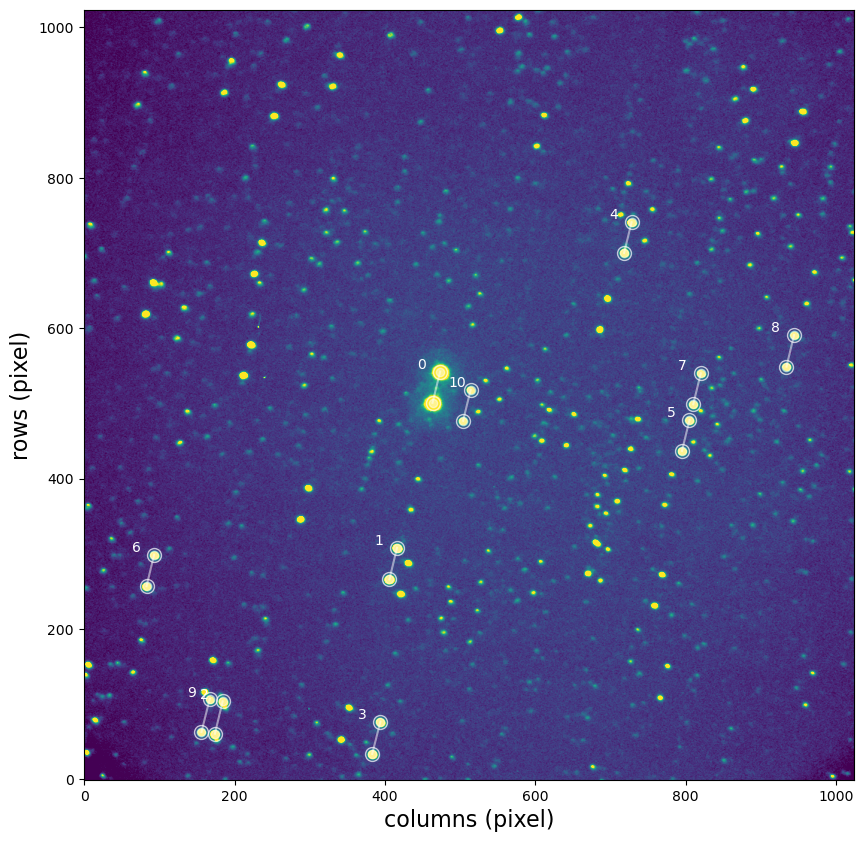

In [18]:
# run stack and reduce individual science images (produce *_proc.fits)
p = s4pipelib.stack_and_reduce_sci_images(p,
                                          pol_l4_list,
                                          reducedir,
                                          stack_suffix=l4_stack_suffix,
                                          force=FORCE,
                                          match_frames=True,
                                          polarimetry=True,                                              
                                          verbose=True,
                                          plot=True) 

## Calculate `QUARTER-WAVE` POLARIMETRY

In [19]:
# input reduced files list
red_pol_l4_list = ["{}/{}".format(reducedir, os.path.basename(f).replace(".fits","_proc.fits")) for f in pol_l4_list]
    
# group input list into polarimetric sequences
pol_sequences = s4utils.select_polar_sequences(red_pol_l4_list, 
                                               sortlist=True, 
                                               npos_in_seq=16, 
                                               rolling_seq=False, 
                                               verbose=True)

Sequence 1 of 1 : 16 files for 16 waveplate positions


2023-11-24 14:20:32,810 astropop - INFO - Normalization disabled.  [__init__]


There is already a polarimetry product : /Users/eder/Data/SPARC4/minidata/reduced//sparc4acs1/20230604/20230604_s4c1_000487_stdpol_l4_polar.fits
Source index: i=0 
Source RA=280.2133466864533 Dec=-6.77946225484136 mag=-18.3707+-0.0002
Best aperture radius: 10.0 pixels
Polarization in Q: 0.0463+-0.0004
Polarization in U: 0.00+-0.04
Polarization in V: -0.0009+-0.0004
Total linear polarization p: 0.0463+-0.0006
Angle of polarization theta: 0.3+-0.3
Free constant k: 1+-nan
Zero of polarization: 10+-10
RMS of zi residuals: 0.00047
Reduced chi-square (n=8.0, DOF=4.0): 1.34


/Users/eder/anaconda3/lib/python3.11/site-packages/astropop/math/physical.py:99: RuntimeWarning: invalid value encountered in cast
  return -np.int_(np.floor(np.log10(np.abs(std)))) + sig - 1
<__array_function__ internals>:200: RuntimeWarning: invalid value encountered in cast


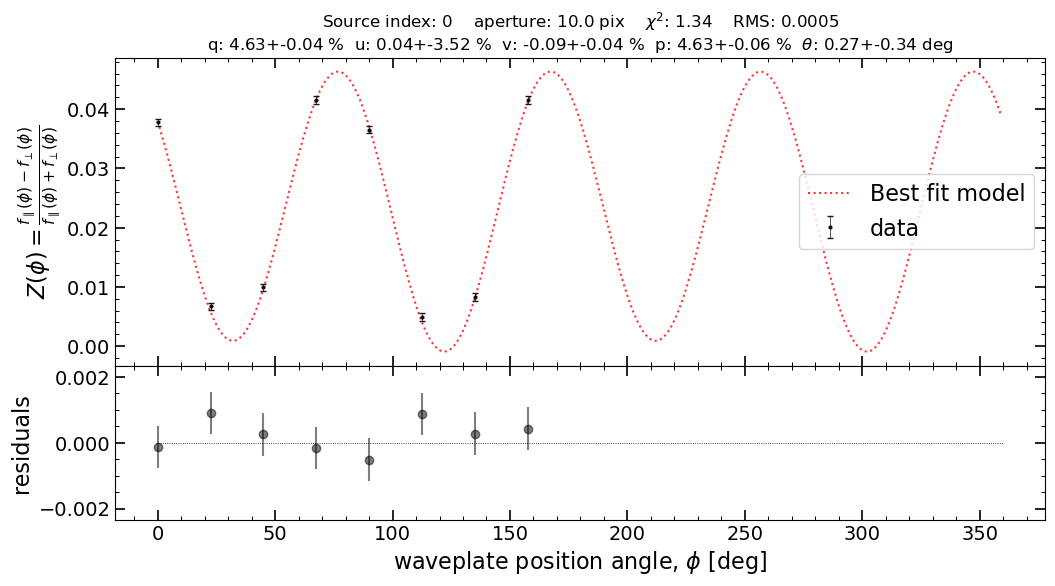

In [20]:
l4_polar_products = []

for i in range(len(pol_sequences)) :    
        
    if len(pol_sequences[i]) == 0 :
        continue
            
    polarproduct = s4pipelib.compute_polarimetry(pol_sequences[i], 
                                                 wppos_key='WPPOS',
                                                 wave_plate = 'quarterwave',
                                                 base_aperture = p['APERTURE_RADIUS_FOR_PHOTOMETRY_IN_POLAR'],
                                                 compute_k = False,
                                                 fit_zero = True,
                                                 force=FORCE,
                                                 zero = 0)

    pol_results = s4pipelib.get_polarimetry_results(polarproduct,
                                                    source_index=0,
                                                    min_aperture=4,
                                                    max_aperture=25,
                                                    plot=True,
                                                    verbose=True)
    l4_polar_products.append(polarproduct)    

## Time series of `QUARTER-WAVE` polarimetry data

In [21]:
# set suffix for output time series filename
ts_suffix = "{}_s4c{}_{}{}".format(NIGHTDIR,
                                   CHANNEL,
                                   OBJECTID.replace(" ",""), 
                                   polsuffix)   

PolarTimeSeriesProduct = s4pipelib.polar_time_series(l4_polar_products,
                                                     reduce_dir=reducedir,
                                                     ts_suffix=ts_suffix,
                                                     aperture_radius=p['APERTURE_RADIUS_FOR_PHOTOMETRY_IN_POLAR'],
                                                     min_aperture=p['MIN_APERTURE_FOR_POLARIMETRY'],
                                                     max_aperture=p['MAX_APERTURE_FOR_POLARIMETRY'],
                                                     force=FORCE)

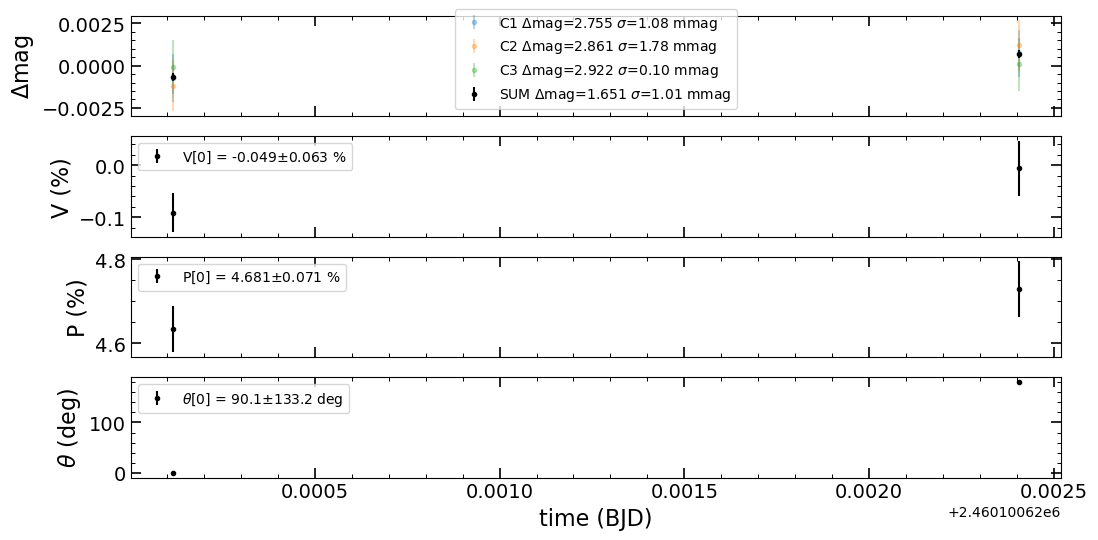

In [22]:
s4plt.plot_polar_time_series(PolarTimeSeriesProduct, 
                             target=0, 
                             comps=[1,2,3], 
                             plot_total_polarization=True, 
                             plot_polarization_angle=True)